# Exploring Color Magnitude Diagrams in Python
##### By: N. Franz, J. Isbell,  E. Prather
---
### Instructions on the Notebook
During the pre-lecture video we will go through this Python notebook through section 3. This way, we will be able to start at section 4 during class and get into some of the more fun stuff :)

---
### Background on Notebooks
Some vital information:
1. This is called a "Jupyter Notebook" (said like Jupiter Notebook). It is a common tool used by astronomers to write and develop code for their research, primarily for looking at data. It runs Python code in small blocks, each like a mini program.  
2. Each block of code is called a "cell", to run a cell you can click into it with your mouse and press `Shift-Enter`.
3. When you run a cell, some will output plots/figures or text at the bottom of them. This will give you some information about the code and color magnitude diagrams. Other cells won't have any output, and that's okay!
4. You may not understand fully what the code is doing and that is *totally okay*! This is as much about the astronomy as it is the code. Our goal for this notebook is to provide a soft introduction to Python code for those who have never seen it.

---

### Setup for the Notebook

Before doing anything else, we need to execute the following cell by pressing `Shift-Enter`. This cell will install some existing code we need for the Notebook and download some data that we have prepped for it.

In [1]:
# Import useful software for this workbook
%load_ext autoreload
%autoreload 2
import os
from urllib.request import urlopen
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u
from matplotlib.patches import Ellipse, Rectangle

#############################################################################################################################
######################################### Download and install some Software/Code ###########################################
#############################################################################################################################
data_urls = [
    "https://raw.githubusercontent.com/noahfranz13/astro-education-nbs/refs/heads/main/notebooks/util.py", # useful code
    "https://raw.githubusercontent.com/noahfranz13/astro-education-nbs/refs/heads/main/data/gaia_cone_search_results.csv", # Gaia results
    "https://github.com/noahfranz13/astro-education-nbs/raw/refs/heads/main/data/isochrones.pkl.zip" # isochrone data
]

for url in data_urls:
    
    # derive the filename from the url
    filename = os.path.join(os.getcwd(), url.split("/")[-1])
    if os.path.exists(filename): continue

    # request the data from that url and write it to a file
    res = urlopen(url)
    with open(filename, "wb") as f:
        f.write(res.read())

try:
    from util import *
except ImportError as exc:
    raise Exception("Please make sure you run the above cell to download all of the other code and data!") from exc
#############################################################################################################################


---

### 1. Reviewing Hertzsprung-Russell / Color Magnitude Diagrams

First, try to fill in this table with your intuition for meaning of locations on a Color Magnitude Diagram. The possible labels you can use are listed below: 
1. `bluer, brighter`, 
2. `redder, brighter`, 
3. `bluer, dimmer`, 
4. `redder, dimmer`. 

Now, we're going to write some code! In the code cell below, you will change all of the "CHANGE ME" values to the corresponding values from the list above (but be sure to leave the double quotes around it!). These values will then be plotted by a Python function called `plot_labels_cmd`. In general, this demonstrates how to create a figure in Python and add labels to it. For the extra curious learner who would like to get into the nitty gritty of the Python code, throughout this notebook we will use code that is written in the `util.py` file. 

Consider the following labelled color magnitude diagram when choosing your labels for each location.

<img src=./example-cmd.png width=40% height=40%></img>

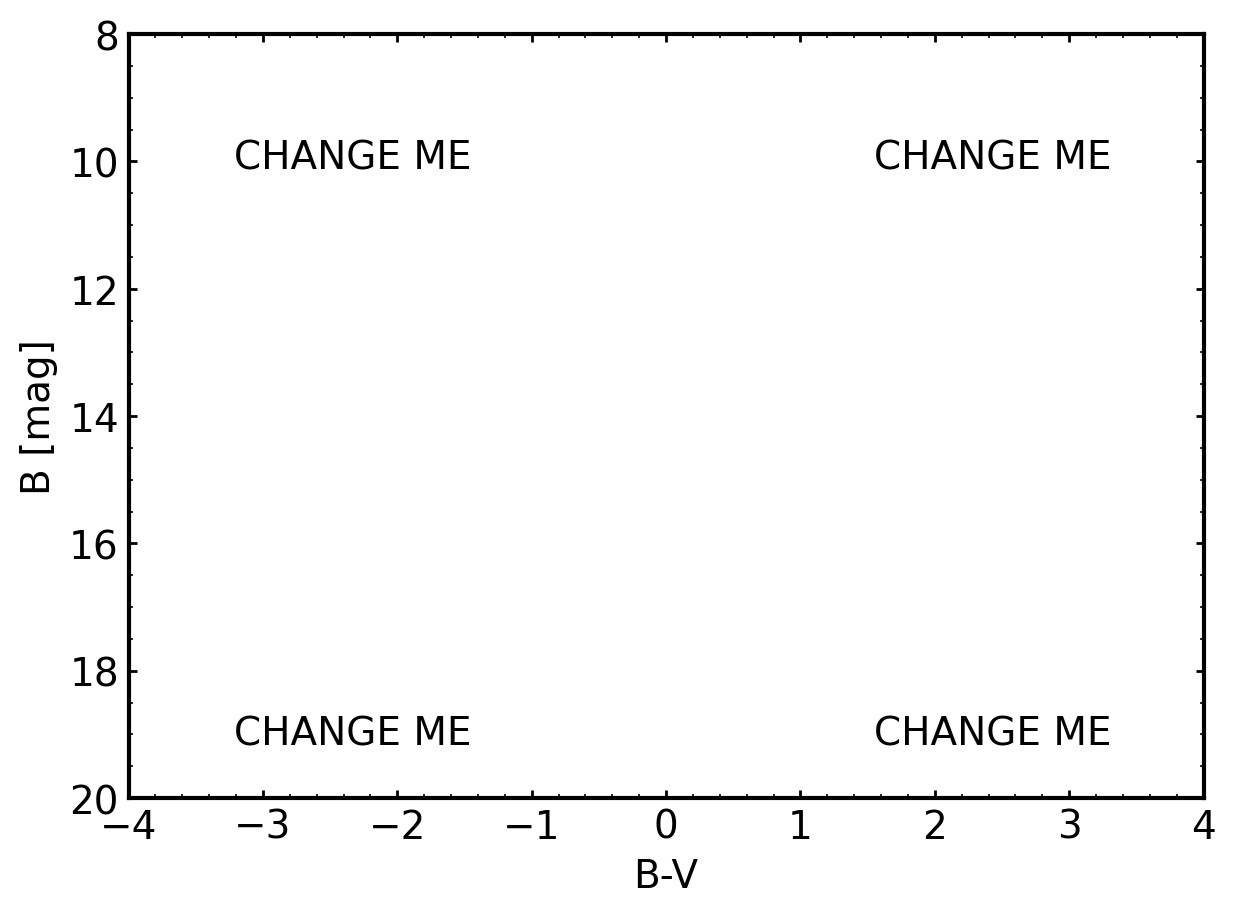

In [2]:
# This is a python comment -- anything after a # is ignored by python
# In the below code, we use comments to explain what the lines of code do

# Define the labels
labels = {
    "upper-left":   "CHANGE ME",
    "upper-right":  "CHANGE ME", 
    "lower-left":   "CHANGE ME", 
    "lower-right":  "CHANGE ME"
    }

# Plot the labels on the CMD
fig = plot_labels_cmd(labels)
fig.gca().invert_yaxis()

**Pause the Video Here!!!**

Next, you'll do the same thing on your own but using color labels rather than the relative temperature. While doing this you should be thinking about how these color magnitude diagrams connect to the Hertzsprung-Russell diagrams! 

Your label word bank is: 
1. `hotter, brighter`, 
2. `hotter, dimmer`, 
3. `colder, brighter`,
4.  `colder, dimmer`

*HINT!*  Try to think about how the color relates to the temperture labels you gave in the previous question!

And, just like above, change the CHANGE ME's below (but be sure to leave the double quotes around it!).

<img src=./example-cmd.png width=40% height=40%></img>

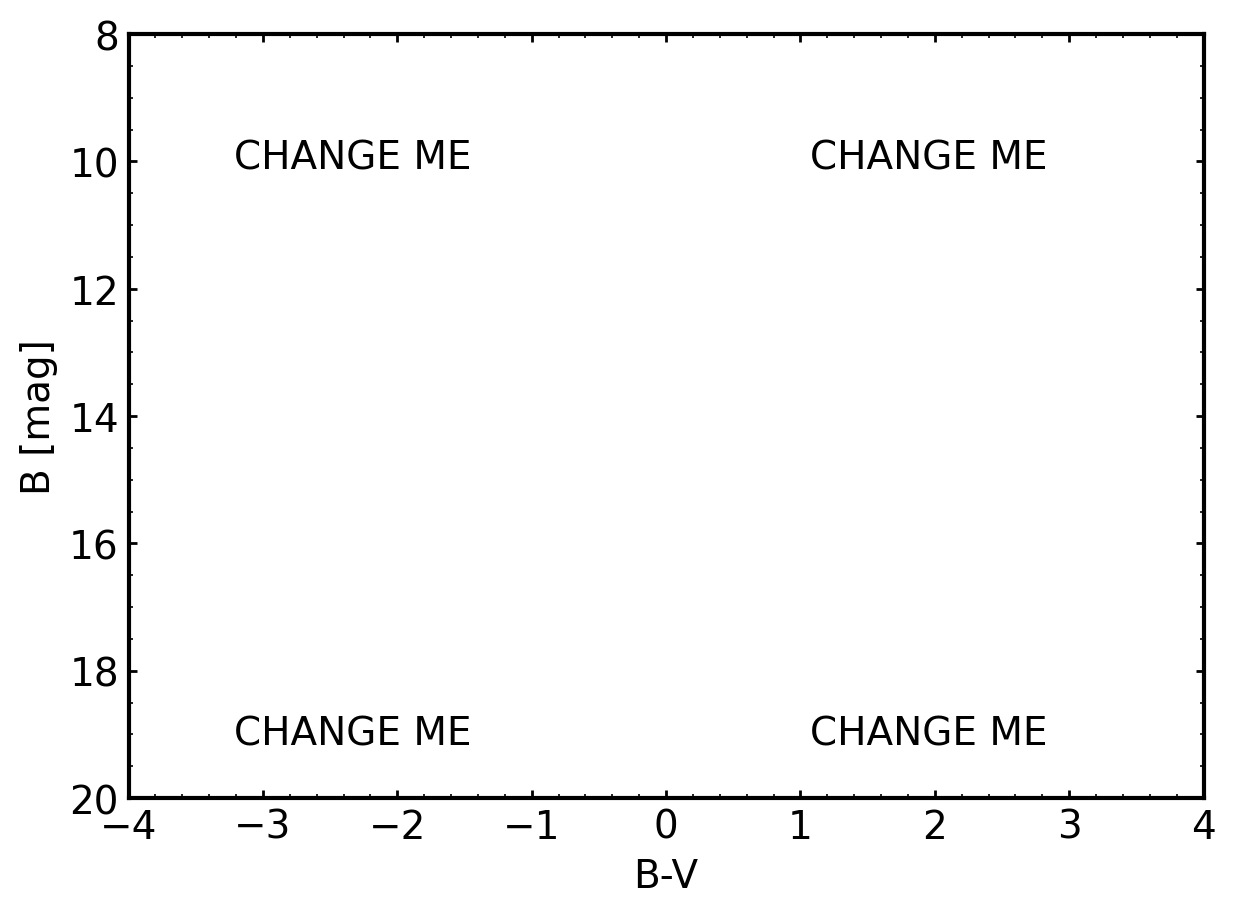

In [3]:
# Define the labels
labels = {
    "upper-left":   "CHANGE ME",
    "upper-right":  "CHANGE ME", 
    "lower-left":   "CHANGE ME", 
    "lower-right":  "CHANGE ME"
    }

# Plot the labels on the CMD 
fig = plot_labels_physical(labels)
fig.gca().invert_yaxis()

---

### 2. Exploring the Dataset

For this activity, we've put together a dataset of stars that belong to the cluster [Messier 67](https://en.wikipedia.org/wiki/Messier_67). As you learned in this class, stars in clusters tend to have nearly the same age since they were all born around when the cluster itself was born. Also since they are in a cluster, they should all be at about the same location and distance from Earth. When you have a large dataset, and you want to reduce it to only the data you care about for your data analysis of that cluster, the distance and age are examples of properties we can cut on.

For now, we are just going to give you the dataset of the stars in M67. Later on you will have to do more of this yourself.

When we plot the Color Magnitude Diagram of M67 from this data we get the following plot.

_ACTIVITY_:
Place the following letters at the corresponding coordinates on the figure.
1. Put an A somewhere on the main sequence
2. Place a B at the coordinates where a star that has evolved off the main sequence is currently living (i.e. the Red Giant Branch)
3. (ED SAYS TO REPHRASE) Place a C at the coordinates where a star that is currently on the Red Giant Branch would have been on the main sequence.
4. Place a D on top of stars that are currently evolving off of the main sequence (i.e. the "Main Sequence Turnoff Point")
5. Place an E where stars that have evolved past the Red Giant Branch would be on this diagram. (Hint: this is where White Dwarf Stars are on this diagram).

To do this, replace the "CHANGE ME" below for each labels x and y position. For example, if I thought A resided at the coordinates (color index, apparent magnitude) = (0.4, 11) I would change 
```
A_coordinate = ("CHANGE ME", "CHANGE ME")
```
to
```
A_coordinate = (0.4, 11)
```

When you write code like this, you are *defining a variable*. This means that you are storing the value (on the right hand side of the equal sign) in a variable (on the left hand side of the equal sign). This is just like in algebra when you say `x = 1`. The advantages of defining a variable is that you can save values for use later on in the code!

For reference, here is the blank color magnitude diagram that you will be labeling.

<img src=./example-cmd-real-data.png width=40% height=40%></img>

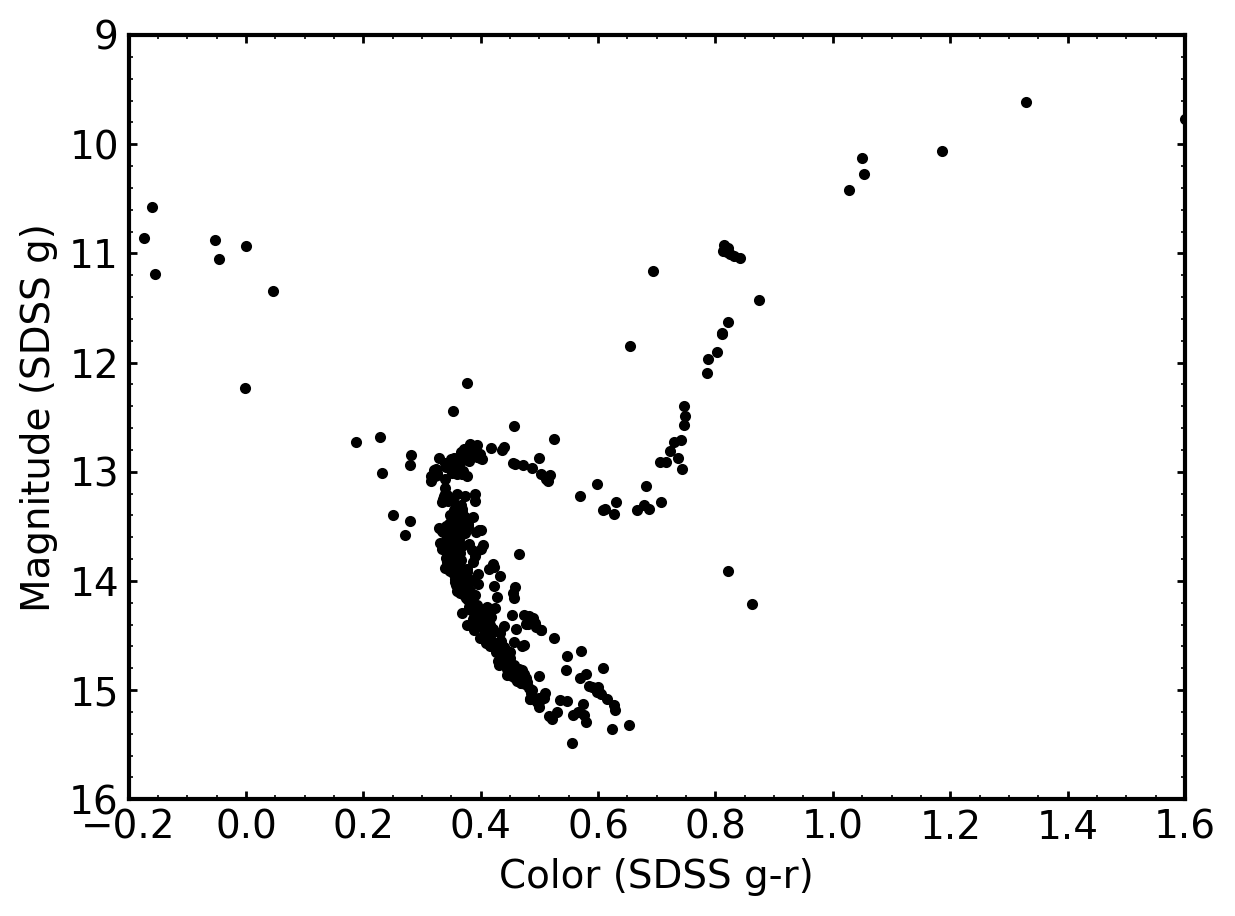

In [4]:
# Define the coordinates here
A_coordinate = ("CHANGE ME", "CHANGE ME")
B_coordinate = ("CHANGE ME", "CHANGE ME")
C_coordinate = ("CHANGE ME", "CHANGE ME")
D_coordinate = ("CHANGE ME", "CHANGE ME")
E_coordinate = ("CHANGE ME", "CHANGE ME")

### CODE TO DISPLAY THE CLUSTER DATA AND COORDINATES
### DO NOT CHANGE BELOW THIS LINE
ax = show_cluster_data()
write_label(*A_coordinate, "A", ax)
write_label(*B_coordinate, "B", ax)
write_label(*C_coordinate, "C", ax)
write_label(*D_coordinate, "D", ax)
write_label(*E_coordinate, "E", ax)

An astute student would have noticed that in the example we have no quotes
around the numbers in the example coordinates. This is important because these are _numbers_ not _strings_, 
where strings are text. Being careful about strings/text vs. numbers later on in this notebook will be important!

---
### 3. From Data to Isochrones

Isochrones are evolutionary tracks of a single stellar population on a Color-Magnitude Diagram. Rather than the messy, observed dataset that you labelled above, these are _models_ of what a single stellar population would look like. 

A sample isochrone is shown below. Please label it with the same labels you used above for the dataset of M67:
1. Put an A somewhere on the main sequence
2. Place a B at the coordinates where a star that has evolved off the main sequence is currently living (i.e. the Red Giant Branch)
3. (Ed says to REPHRASE) Place a C at the coordinates where a star that is currently on the Red Giant Branch would have been on the main sequence.
4. Place a D on top of stars that are currently evolving off of the main sequence (i.e. the "Main Sequence Turnoff Point")
5. Place an E where stars that have evolved past the Red Giant Branch would be on this diagram. (Hint: this is where White Dwarf Stars are on this diagram).

<img src=./sample-isochrone.png width=40% height=40%></img>

After labeling the figure with the letters, try playing around by changing the `age` variable. You can put it anywhere between 1 and 14.5 (which is the age in Gyr or $10^9$ years!) 

How does this change the y axis limits? How does this change the location of the main sequence turnoff?

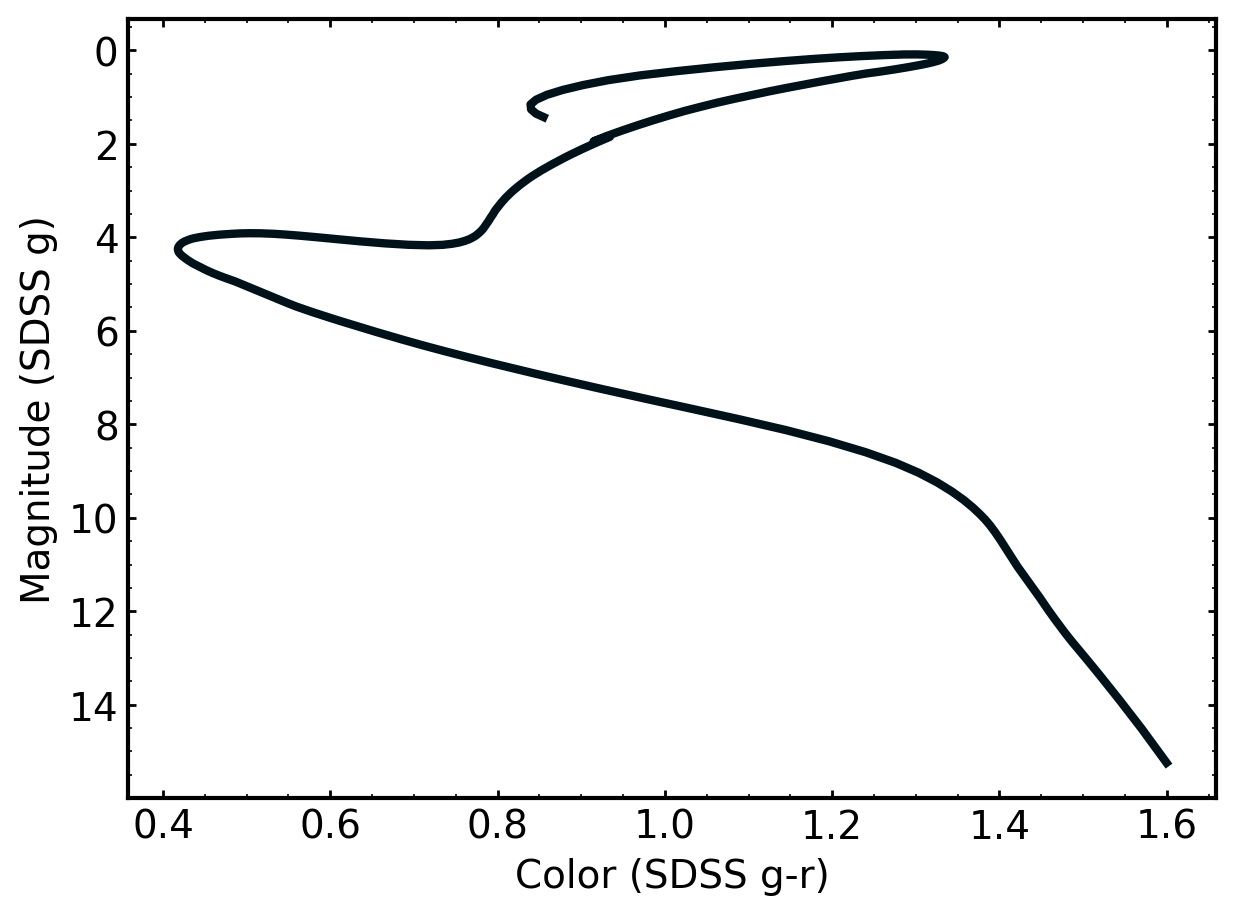

In [5]:
A_coordinate = ("CHANGE ME", "CHANGE ME")
B_coordinate = ("CHANGE ME", "CHANGE ME")
C_coordinate = ("CHANGE ME", "CHANGE ME")
D_coordinate = ("CHANGE ME", "CHANGE ME")
E_coordinate = ("CHANGE ME", "CHANGE ME")

age = 8

### CODE TO DISPLAY THE CLUSTER DATA AND COORDINATES
### DO NOT CHANGE BELOW THIS LINE
ax = show_isochrone(age=age)
# ax.invert_yaxis()
write_label(*A_coordinate, "A", ax)
write_label(*B_coordinate, "B", ax)
write_label(*C_coordinate, "C", ax)
write_label(*D_coordinate, "D", ax)
write_label(*E_coordinate, "E", ax)

---
<img src=./stop-sign.png width=10% height=10%></img>

# STOP HERE
### We will finish this notebook in class

--- 
### 4. Fitting Data with Isochrones

The shape and main sequence turnoff location of isochrones are primarily dependent on the age of the stellar population (some other properties matter, like metallicity, but we aren't worrying about those here). _When studying a cluster of stars, we are interested in measuring the age of the population._ To do this, we need to fit the model isochrone to the observed data. (ED SAYS EDIT THIS SENTENCE, maybe replace "rescaled" with "adjusted", maybe make sure to adjust the sentence to use the word distance) But, isochrones, like the ones we use here, are typically given in absolute magnitudes (which is a direct indication of an objects luminosity), so they must be rescaled to apparent magnitude to compare with our dataset.

To rescale our isochrone data, we use the _distance modulus_, which converts from the absolute magnitude to apparent magnitude given a distance. The equation for the distance modulus is

$m-M = 5 \log_{10}(\frac{d}{10 pc})$.


<!--
1. Libarary of pre-computed models for different ages and metallicities
    - maybe [https://waps.cfa.harvard.edu/MIST/model_grids.html](https://waps.cfa.harvard.edu/MIST/model_grids.html)
2. Functions to change them by distance 
3. Interactive element to have them scale/change the values 
    - start with sliders and then move into code entering???
    - display a range of values to guide some guesswork 
4. Ask which isochrones work best and why? 
    - can we find an example where there's some degeneracy? 
-->

### 4.1 Computing apparent magnitude by writing a python function 

(ED SAYS THAT WE NEED TO ADJUST THIS LANGUAGE! TALK MORE ABOUT NUMPY AND WHAT IT ACTUALLY IS AND WHY WE USE IT)

At a fundamental level, Python functions and mathematical equations are very similar. They take in a number of arguments, do some operations on them, and produce a value. Unfortunately, Python can't read mathematical notation directly, so even though the parts and the process are the same, the presentation is a bit different. Take for example the polynomial equation 
$$f(x) = a x + b x^2 + c x^3$$ 
in Python it could be written as
```
def f(x):
    return a * x + b * np.power(x,2) + c * np.power(x,3)
```

Consider again the distance modulus. The value we want is the apparent magnitude $m$ as a function of distance $d$, so the above equation can be rewritten as 
$$
m(M, d) = M + 5 \log_{10}\left(\frac{d}{10~\rm{pc}}\right)
$$. 

**Task** Write a Python function to compute the apparent magnitude for an object with absolute magnitude $M$ and distance $d$. A scaffold has been laid out below. 



(Hint: use one of the above numpy mathematical operations)

(Hint 2: Python doesn't know about units, so don't worry about including parsecs or magnitudes )

In [10]:
#scaffold for apparent magnitude function
def apparent_magnitude(CHANGE_ME0, CHANGE_ME1):
    #Replace the CHANGE_MEs with the appropriate values
    return "CHANGE_ME"

### THESE ARE UNIT TESTS FOR THE FUNCTION YOU WROTE
### UNIT TESTS WILL HELP TEST CODE YOU HAVE WRITTEN 
epsilon = 1e-1

assert apparent_magnitude(0, 10) == 0 or apparent_magnitude(10, 0) == 0, f"Your function did not work on M=0, d=10 pc!"
assert abs(apparent_magnitude(5, 40) - 8.01) < epsilon or abs(apparent_magnitude(10, 0) - 8.01) < epsilon, f"Your function did not work on M=5, d=40 pc!"
assert abs(apparent_magnitude(-1, 400) - 7.01) < 0 or abs(apparent_magnitude(400, -1) - 7.01) < 0, f"Your function did not work on M=-1, d=400 pc!"

AssertionError: Your function did not work on M=0, d=10 pc!

Once you've written your function, run the cell below to test it on the table of values below to make sure it's correct before we proceed. 

| Absolute Mag | Distance (pc) | Expected Answer | Your Answer |
| ------------ | ------------- | --------------- | ----------- |
| 0            | 10            | 0               |             |
| 5            | 40            | 8.01            |             |
| -1           | 400           | 7.01            |             |

_Aside_: These are generally called "unit tests" and help to test code on basic examples.


In [11]:
# Call your apparent_magnitude function here to see what answer you get 
# and to fill in the above table

mag = apparent_magnitude(CHANGEME, CHANGEME)

NameError: name 'CHANGEME' is not defined

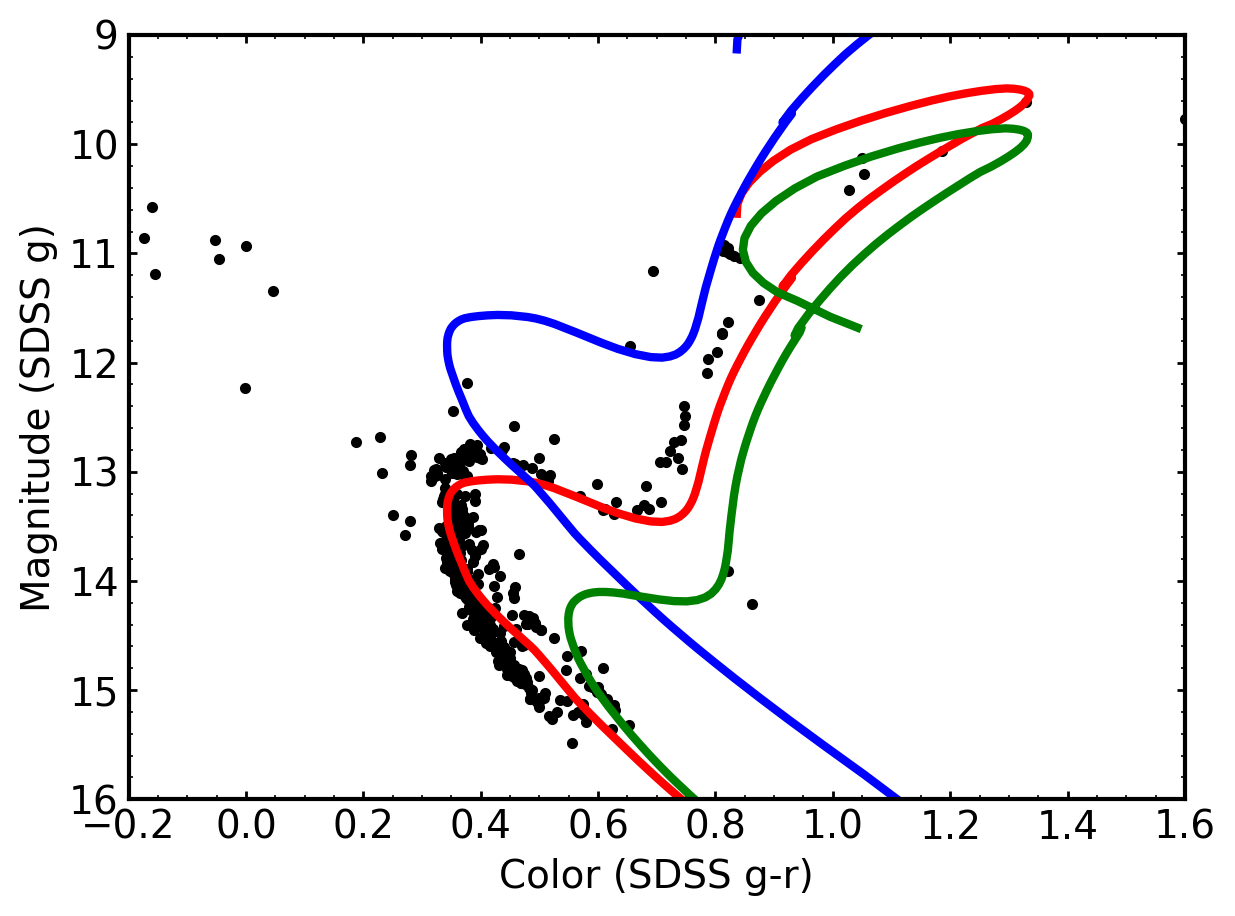

In [12]:
ax = show_cluster_data()
ax = show_correct_isochrone(ax=ax)
ax = show_close_isochrone(ax=ax)
ax = show_old_isochrone(ax=ax)
ax.invert_yaxis()

---
### 5. Changing the Dataset

Before our final challenge, let's explore in a bit more detail how we actually got the data for M67. This way, you can tune different parameters if you'd like to narrow (or broaden) the focus of the dataset. 

We started with all of the data from Gaia, a space based telescope that is surveying starts within the entire Milky Way and parts of nearby galaxies. We then made the following cuts on the dataset:
1. We performed a cone search centered on the coordinates of the cluster with a radius of 2 arcseconds. You can imagine that narrowing this radius will cut out some stars in the cluster and broadening it will possibly include some field stars that are not in the cluster. Of course, the 2 arcsecond radius is just what we thought was best, so you should definitely play around with it!
2. You can imagine that, since the stars in a cluster are gravitationally bound, all of them should be moving on the sky at about the same velocity with some small amount of deviation. This allows us to tune two other parameters:
   a. Radial velocity is a stars velocity towards or away from Earth. We can set an upper and lower limit on this to find stars that are moving similar to each other on the sky
   b. Proper motion is a stars velocity across the sky and is typically measured in both the RA and Declination directions. So, we can make a cut on proper motion by removing stars that lie outside some proper motion delta centered at a proper motion RA and Declination.
3. The third cut we can make, of course, is on the distance to the stars. Since we have Gaia data, we can use their parallax measurement. Similar to the velocity, we can simply give a minimum and maximum parallax for the stars in the cluster.

Below, you can change any of the numbers and see how it changes the amount of stars on the Color-Magnitude Diagram. Then, once you're done and feel like you understand how all of these different factors affect the color magnitude diagram of the cluster, you can move onto the final challenge!

<Axes: xlabel='Color (SDSS g-r)', ylabel='Magnitude (SDSS g)'>

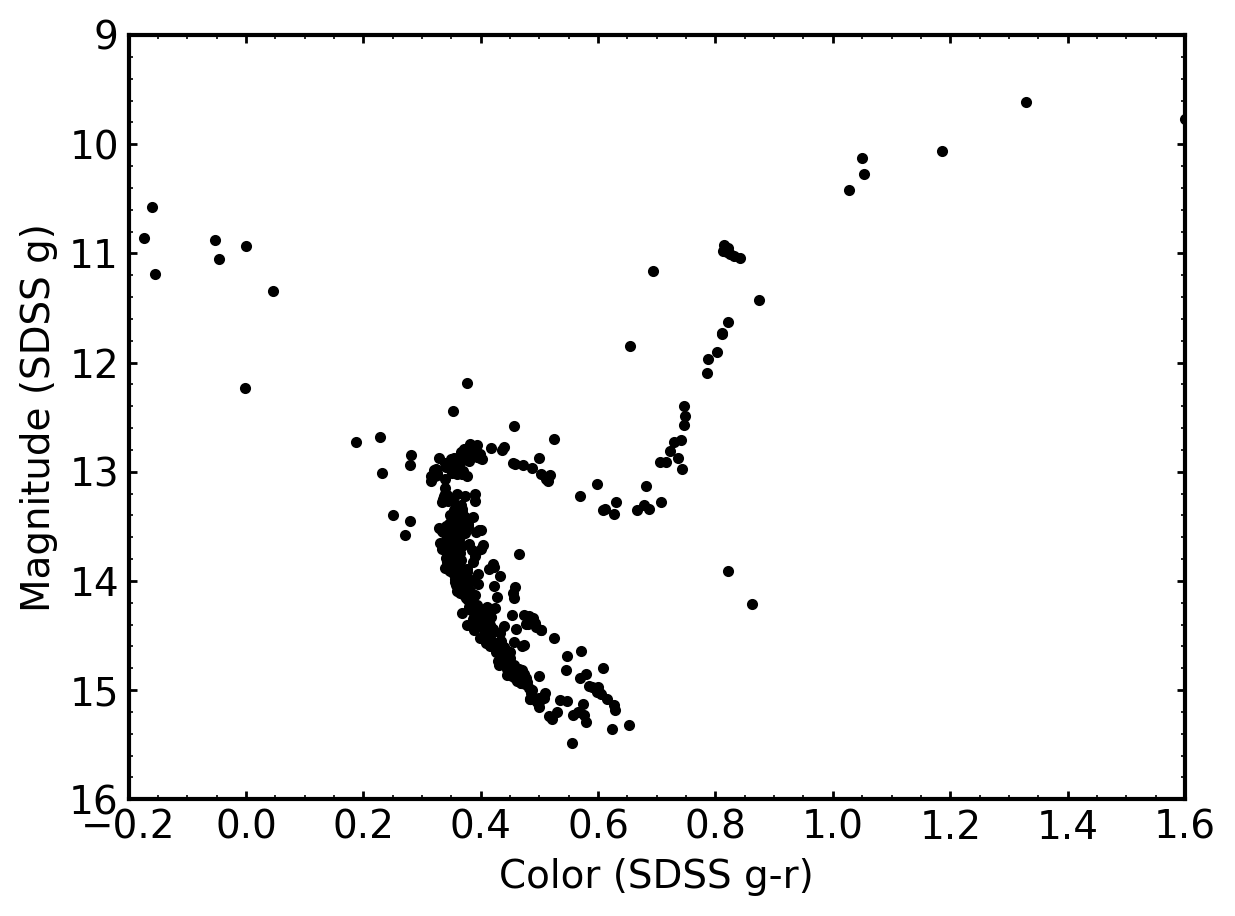

In [13]:
show_cluster_data(
    cone_search_radius=2,
    minimum_radial_velocity=20.4, #km/s
    maximum_radial_velocity=47.6, #km/s
    minimum_parallax=1.03, 
    maximum_parallax=1.27,
    proper_motion_delta=0.7,
    proper_motion_ra=-11,
    proper_motion_dec=-2.9,
)

---
### 6. The Final Challenge: Fitting the Dataset

For our final challenge, try to fit the data by changing the age of and distance to the cluster! (You can do this by changing the numbers next to `age=` and `distance=`). Fitting a dataset means finding the model that best represents the data. This can be done a variety of different ways, but for now, you can change the age and distance by hand to find the isochrone that looks the most like the data. 

**NOTE:** I think we could/should use a different cluster for this. This will allow us to have the discussion above about what a turnoff means and to add a bit more to reinforce that all these stars are the same age. For example, we had talked about identifying which spectral type can be found at the turnoff and what this means about the age. I am unsure right now (at 5 am) how we represent that. This will also allow the students to set the cuts on their own, leading to more discussion about the choices beyond only age and distance. 


Hint: The age should be somewhere between 1 and 10 Gyrs and the distance should be between 400 and 1200 pc.

Alternate hint: Think about what ages make sense. How old is the Universe? How old is the Sun? 

Alternate hint 2: These stars are within the Milky Way, so you can narrow down the maximum distance. The closest stars are 1pc away. 

Once you find what you think is the best fitting isochrone, compare with your neighbors! What age and distance did you get? How did that compare to your neighbor? If they are different, why do you think that is?

<Axes: xlabel='Color (SDSS g-r)', ylabel='Magnitude (SDSS g)'>

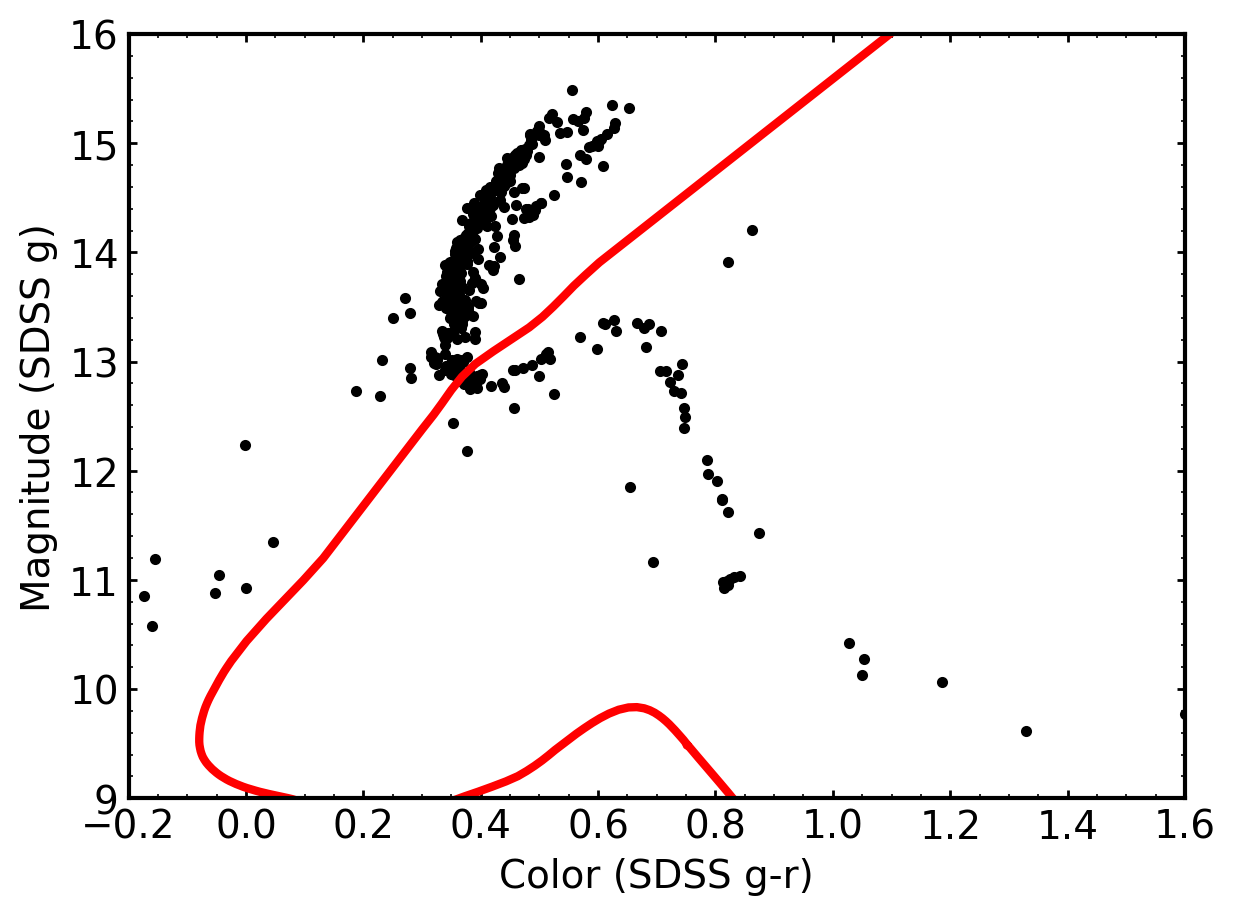

In [14]:
ax = show_cluster_data(
    cone_search_radius=2,
    minimum_radial_velocity=20.4, #km/s
    maximum_radial_velocity=47.6, #km/s
    minimum_parallax=1.03, 
    maximum_parallax=1.27,
    proper_motion_delta=0.7,
    proper_motion_ra=-11,
    proper_motion_dec=-2.9,
)

show_isochrone(
    age = 1, 
    distance = 400,
    ax = ax,
    color = 'red' # or whatever your favorite color is...
)

--- 
### Extra. Automatically fitting
TBD